# Solving doctor scheduling problem

<b>Minimize the total cost of labor: </b>

$f(x) = \sum(c_i \times x_i) + \sum(c_i^o \times x_i^o) + \sum(c_j^p \times x_j^p)$

<b>Subject to the following constraints:</b>

$\sum(x_i) + \sum(x_i^o) >= 4$ : at least 4 doctors must be scheduled during peak hours

$\sum(x_j^p) >= 2$ : at least 2 doctors must be scheduled during non-peak hours

$x_i, x_i^o, x_j^p \geq 0$ : Non-negativity constraints

where 

$i$ is the index for full-time doctors, $i = 1, 2, ..., m$,

$j$ is the index for part-time doctors, $j = 1, 2, ..., n$,

<b>Predefined parameters are: </b>

$c_i$ is the hourly rate for full-time doctor $i$,

$c_i^o$ is the overtime hourly rate for full-time doctor $i$,

$c_j^p$ is the hourly rate for part-time doctor $j$,

<b>Decision variables are: </b>

$x_i$ is the number of hours worked by full-time doctor $i$ during peak hours,

$x_i^o$ is the number of overtime hours worked by full-time doctor $i$ during peak hours,

$x_j^p$ is the number of hours worked by part-time doctor $j$ during non-peak hours

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pyswarms as ps

### Define objective function

In [8]:
# The given full-time hourly rates, overtime rates, and part-time doctor rates
full_time_rates = np.array([30, 35, 40, 45, 50])
overtime_rates = full_time_rates * 1.5
part_time_rates = np.array([25, 27, 29, 31, 33])

def objective_function(x):
    x1 = x[:, :len(full_time_rates)]
    x2 = x[:, len(full_time_rates):2 * len(full_time_rates)]
    x3 = x[:, 2 * len(full_time_rates):]

    total_cost = np.sum(x1 * full_time_rates) + np.sum(x2 * overtime_rates) + np.sum(x3 * part_time_rates)

    # Penalty terms for constraints
    penalty_x1_x2 = np.maximum(0, 4 - np.sum(x1) - np.sum(x2)) * 10000
    penalty_x3 = np.maximum(0, 2 - np.sum(x3)) * 10000

    total_cost_with_penalty = total_cost + penalty_x1_x2 + penalty_x3

    return total_cost_with_penalty

### Create PSO solver and apply it to solve the problem

In [9]:
# Initialize bounds
min_bound = np.zeros(3 * len(full_time_rates))
max_bound = np.full(3 * len(full_time_rates), 10)
bounds = (min_bound, max_bound)

# set options for PSO
options = {'w': 0.74, 'c1': 2.05, 'c2': 2.05, 'k': 5, 'p': 1}

# Call instance of PSO
optimizer = ps.single.LocalBestPSO(n_particles=30, dimensions=3 * len(full_time_rates), options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(objective_function, iters=100, verbose=True)

# Extract optimal values of x1, x2, and x3
optimal_x1 = pos[:len(full_time_rates)]
optimal_x2 = pos[len(full_time_rates):2 * len(full_time_rates)]
optimal_x3 = pos[2 * len(full_time_rates):]

print("Minimum cost:", round(cost,2))
print("Optimal number of hours worked by full-time doctors during peak hours:", np.asarray(optimal_x1, dtype = 'int'))
print("Optimal number of overtime hours worked by full-time doctors during peak hours:", np.asarray(optimal_x2, dtype = 'int'))
print("Optimal number of hours worked by part-time doctors during non-peak hours:", np.asarray(optimal_x3, dtype = 'int'))


2023-04-26 20:08:38,955 - pyswarms.single.local_best - INFO - Optimize for 100 iters with {'w': 0.74, 'c1': 2.05, 'c2': 2.05, 'k': 5, 'p': 1}
pyswarms.single.local_best: 100%|██████████|100/100, best_cost=9.28e+4
2023-04-26 20:08:39,382 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 92843.46704481664, best pos: [4.91522649 2.42002729 0.70766971 6.99974221 7.99252845 3.6696814
 0.95580372 3.89020203 4.83646478 7.22454995 2.24699629 1.44648376
 6.30448385 3.32742605 3.42711801]


Minimum cost: 92843.47
Optimal number of hours worked by full-time doctors during peak hours: [4 2 0 6 7]
Optimal number of overtime hours worked by full-time doctors during peak hours: [3 0 3 4 7]
Optimal number of hours worked by part-time doctors during non-peak hours: [2 1 6 3 3]


### Visualize the solution

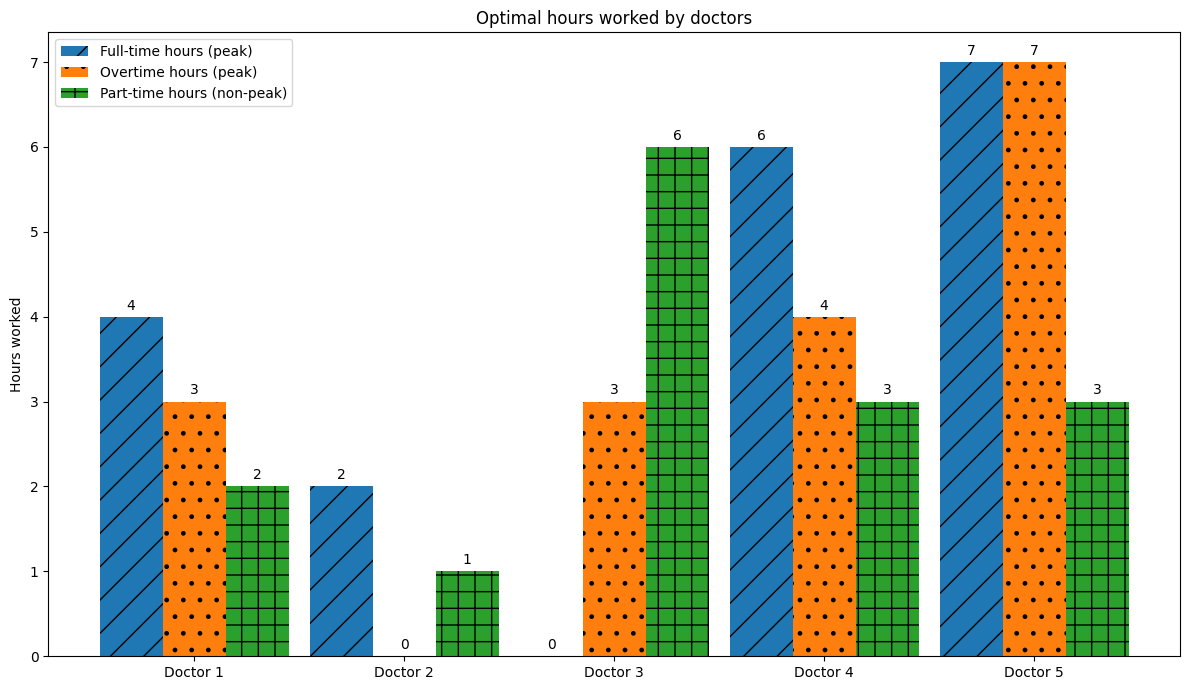

In [13]:
# Plotting the bar chart
labels = [f'Doctor {i+1}' for i in range(len(full_time_rates))]
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width, np.asarray(optimal_x1, dtype = 'int'), width, hatch='/', label='Full-time hours (peak)')
rects2 = ax.bar(x, np.asarray(optimal_x2, dtype = 'int'), width, hatch='.', label='Overtime hours (peak)')
rects3 = ax.bar(x + width, np.asarray(optimal_x3, dtype = 'int'), width, hatch='+', label='Part-time hours (non-peak)')

ax.set_ylabel('Hours worked')
ax.set_title('Optimal hours worked by doctors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

# Attach a text label above each bar in rects1, rects2, and rects3, displaying its height
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig.tight_layout()
plt.show()
# plt.savefig('doctor_scheduling.png', dpi=300)

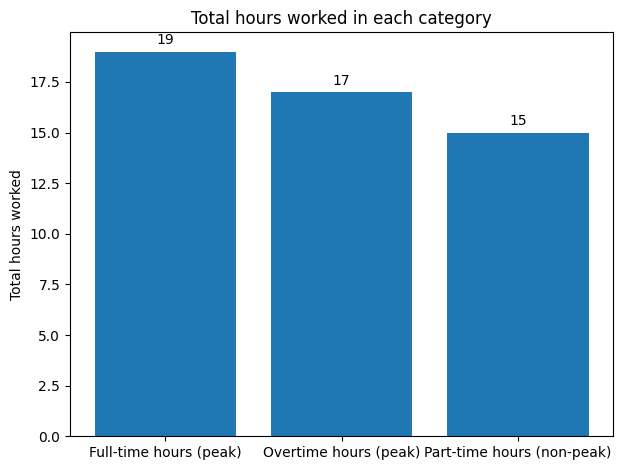

In [11]:
# Calculate the total hours worked in each category
total_full_time_hours = np.sum(np.asarray(optimal_x1, dtype = 'int'))
total_overtime_hours = np.sum(np.asarray(optimal_x2, dtype = 'int'))
total_part_time_hours = np.sum(np.asarray(optimal_x3, dtype = 'int'))

# Bar chart data
categories = ['Full-time hours (peak)', 'Overtime hours (peak)', 'Part-time hours (non-peak)']
total_hours = [total_full_time_hours, total_overtime_hours, total_part_time_hours]

# Plot the bar chart
fig, ax = plt.subplots()
rects = ax.bar(categories, total_hours)

ax.set_ylabel('Total hours worked')
ax.set_title('Total hours worked in each category')

# Attach a text label above each bar in rects, displaying its height
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()
plt.show()